In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
from IPython.display import Image
import os
!ls ../input/imagee

IMG_20240713_222137.jpg


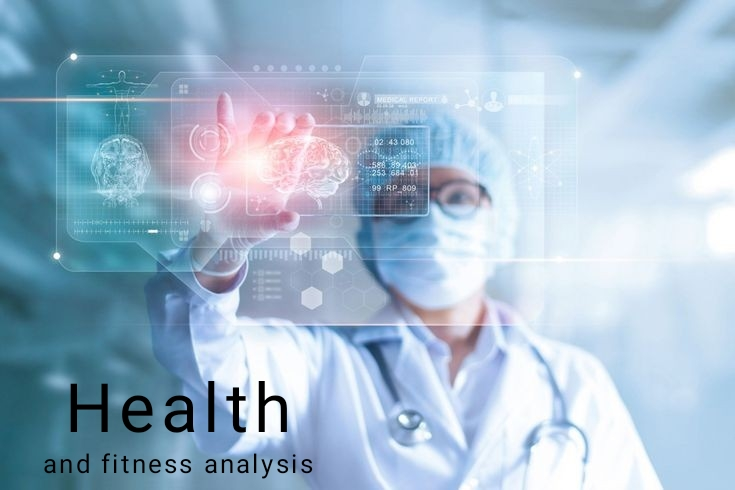

In [ ]:
Image("/kaggle/input/imagee/IMG_20240713_222137.jpg")

**Health and Fitness analysis**

*Fitness assessments are a series of tests that measures and monitors students' physical fitness level. The series of tests assess the five components of physical fitness that make up total fitness: cardiovascular endurance, muscular strength, muscular endurance, flexibility, and body composition*

*Fitness assessment plays a crucial role in achieving fitness goals. By evaluating an individual’s physical health, fitness assessments provide valuable insights that guide individuals towards their desired level of fitness. This article aims to explore the importance and benefits of fitness assessments in helping individuals achieve their fitness objectives*

In [1]:
import pandas as pd
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import plotly.express as px

data = pd.read_csv("/kaggle/input/fitness-analysis/Apple-Fitness-Data.csv")
print(data.head())

         Date       Time  Step Count  Distance  Energy Burned  \
0  2023-03-21  16:01:23           46   0.02543         14.620   
1  2023-03-21  16:18:37          645   0.40041         14.722   
2  2023-03-21  16:31:38           14   0.00996         14.603   
3  2023-03-21  16:45:37           13   0.00901         14.811   
4  2023-03-21  17:10:30           17   0.00904         15.153   

   Flights Climbed  Walking Double Support Percentage  Walking Speed  
0                3                              0.304          3.060  
1                3                              0.309          3.852  
2                4                              0.278          3.996  
3                3                              0.278          5.040  
4                3                              0.281          5.184  


In [2]:
print(data.isnull().sum())

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64


In [3]:
# Step Count Over Time
fig1 = px.line(data, x="Time",
               y="Step Count",
               title="Step Count Over Time")
fig1.show()

> This graph displays step count of a person over time

In [4]:
# Distance Covered Over Time
fig2 = px.line(data, x="Time",
               y="Distance",
               title="Distance Covered Over Time")
fig2.show()

> This graph displays distance covered by person overtime

In [5]:
# Energy Burned Over Time
fig3 = px.line(data, x="Time",
               y="Energy Burned",
               title="Energy Burned Over Time")
fig3.show()

> This graph displays calories burned by person overtime

In [6]:
# Walking Speed Over Time
fig4 = px.line(data, x="Time",
               y="Walking Speed",
               title="Walking Speed Over Time")
fig4.show()

> This graph displays Walking speed of a person overtime 

In [7]:
# Calculate Average Step Count per Day
average_step_count_per_day = data.groupby("Date")["Step Count"].mean().reset_index()

fig5 = px.bar(average_step_count_per_day, x="Date",
              y="Step Count",
              title="Average Step Count per Day")
fig5.update_xaxes(type='category')
fig5.show()

> > This graph displays distance covered by person overtime by step count that help to count energy burned and analysis of fitness metrics

In [8]:
# Calculate Walking Efficiency
data["Walking Efficiency"] = data["Distance"] / data["Step Count"]

fig6 = px.line(data, x="Time",
               y="Walking Efficiency",
               title="Walking Efficiency Over Time")
fig6.show()

> This graph displays that how much a person overtime should walk to maintain yourself health metrics

In [9]:
# Create Time Intervals
time_intervals = pd.cut(pd.to_datetime(data["Time"]).dt.hour,
                        bins=[0, 12, 18, 24],
                        labels=["Morning", "Afternoon", "Evening"], 
                        right=False)

data["Time Interval"] = time_intervals

# Variations in Step Count and Walking Speed by Time Interval
fig7 = px.scatter(data, x="Step Count",
                  y="Walking Speed",
                  color="Time Interval",
                  title="Step Count and Walking Speed Variations by Time Interval",
                  trendline='ols')
fig7.show()

/tmp/ipykernel_33/2894008012.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



> This graph displays distance covered by person overtime and speed plus stepcount by different time variations

         Date       Time  Step Count  Distance  Energy Burned  \
0  2023-03-21  16:01:23           46   0.02543         14.620   
1  2023-03-21  16:18:37          645   0.40041         14.722   
2  2023-03-21  16:31:38           14   0.00996         14.603   
3  2023-03-21  16:45:37           13   0.00901         14.811   
4  2023-03-21  17:10:30           17   0.00904         15.153   

   Flights Climbed  Walking Double Support Percentage  Walking Speed  
0                3                              0.304          3.060  
1                3                              0.309          3.852  
2                4                              0.278          3.996  
3                3                              0.278          5.040  
4                3                              0.281          5.184  


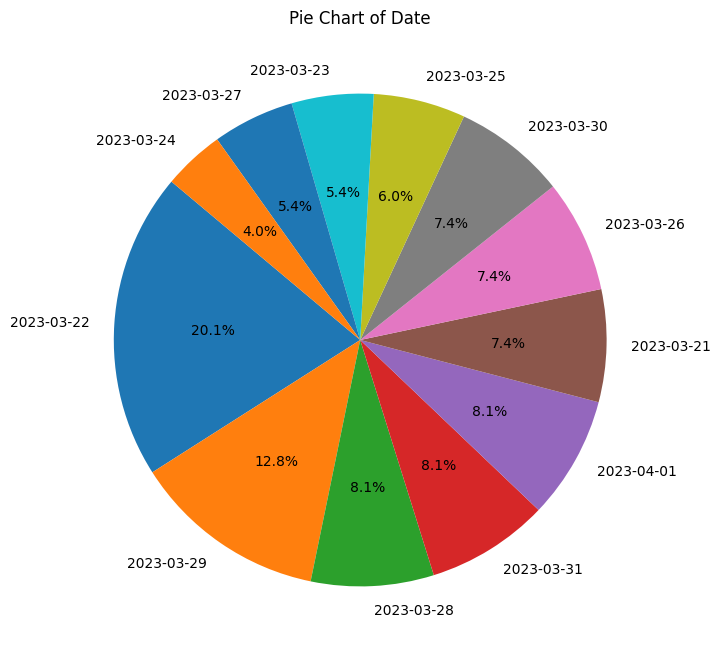

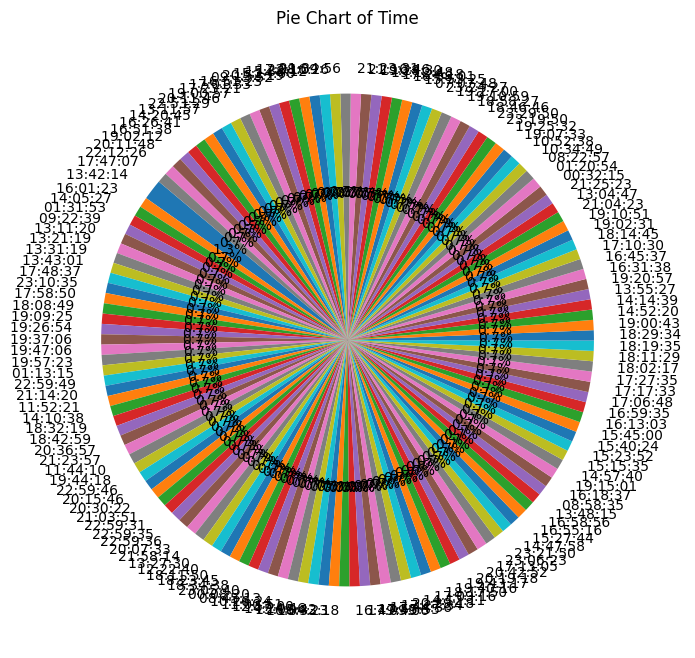

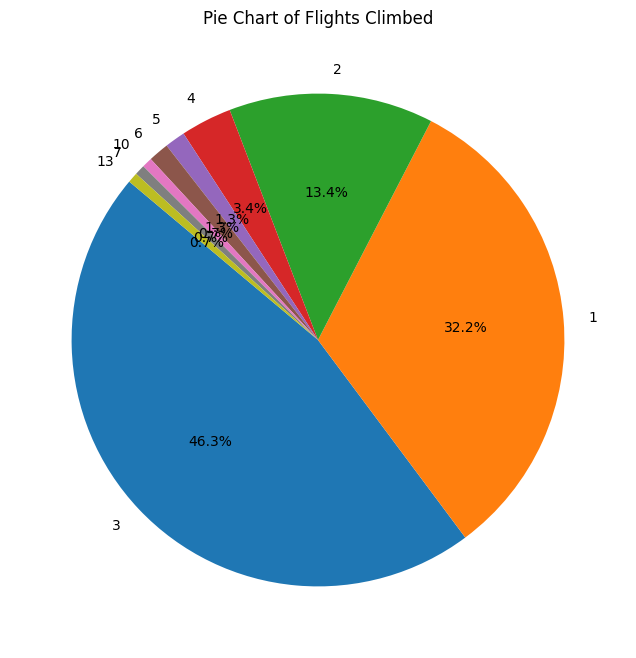

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV
file_path = '/kaggle/input/fitness-analysis/Apple-Fitness-Data.csv' 
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Function to plot a pie chart for a given column
def plot_pie_chart(column_name):
    counts = data[column_name].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {column_name}')
    plt.show()

# Plot pie charts for all categorical columns
for column in data.columns:
    if data[column].dtype == 'object' or len(data[column].unique()) < 20: 
        plot_pie_chart(column)

**Time piechart has many spilts cause of many no of diff dates**

**HEALTH AND FITNESS ANALYSIS FOR A PERSON**

**THANKYOU :)**